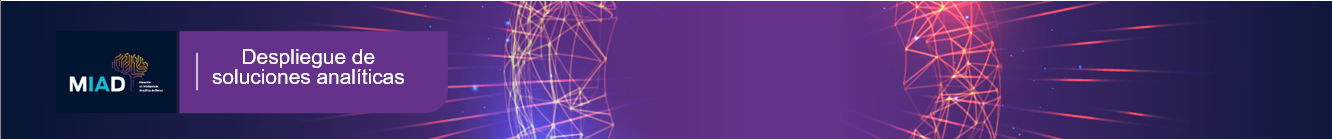

# Analítica Predictiva para la Valoración de Diamantes Basado en Machine Learning con Aprendizaje Supervisado
---

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Importar base de datos**

In [2]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## **2. Exploración de la base de datos**

In [3]:
filas, columnas = data.shape
print("La fuente de informacion tiene un total de", filas, "filas.")
print("La fuente de informacion tiene un total de", columnas, "columnas.")
data.head(5)

La fuente de informacion tiene un total de 53940 filas.
La fuente de informacion tiene un total de 11 columnas.


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


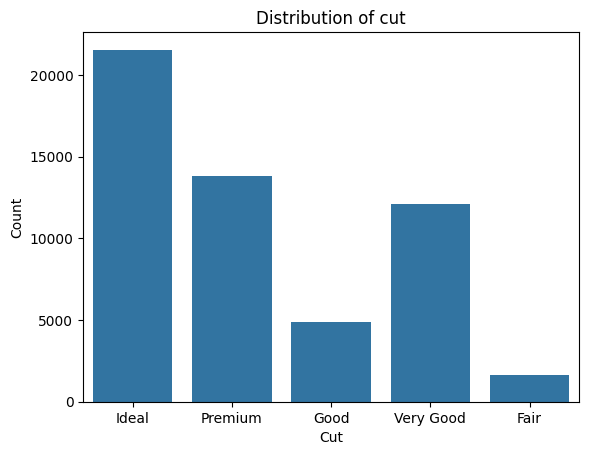

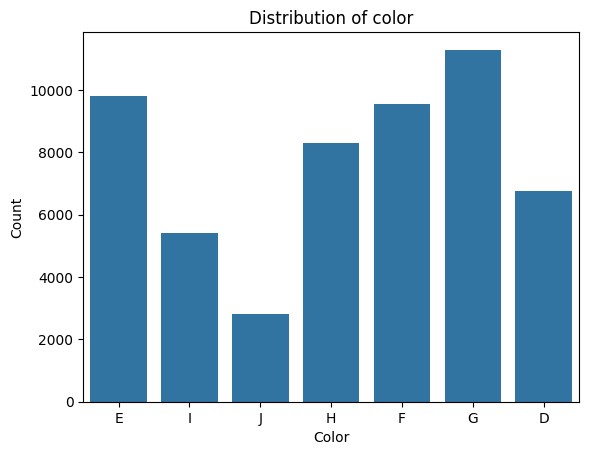

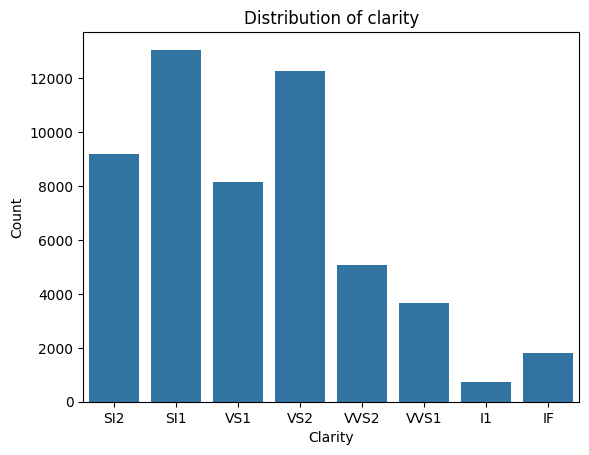

In [9]:
# Variables categóricas de la base de datos
categorical_columns = ['cut', 'color', 'clarity']

for col in categorical_columns:
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.show()

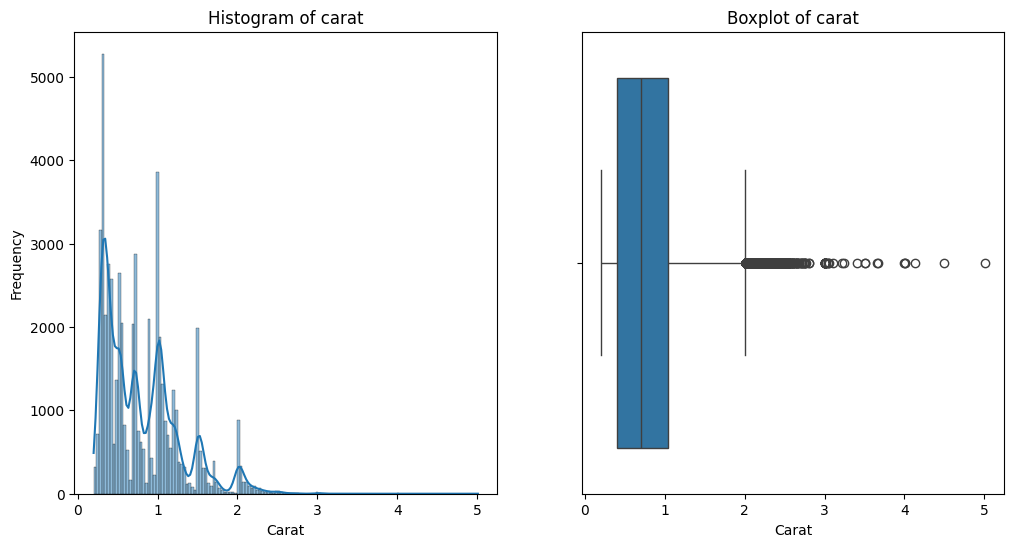

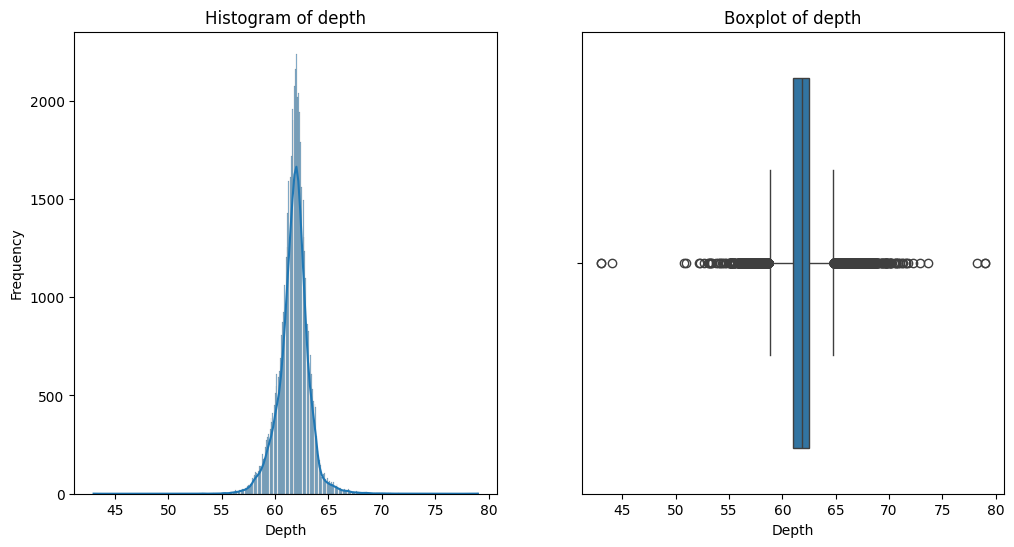

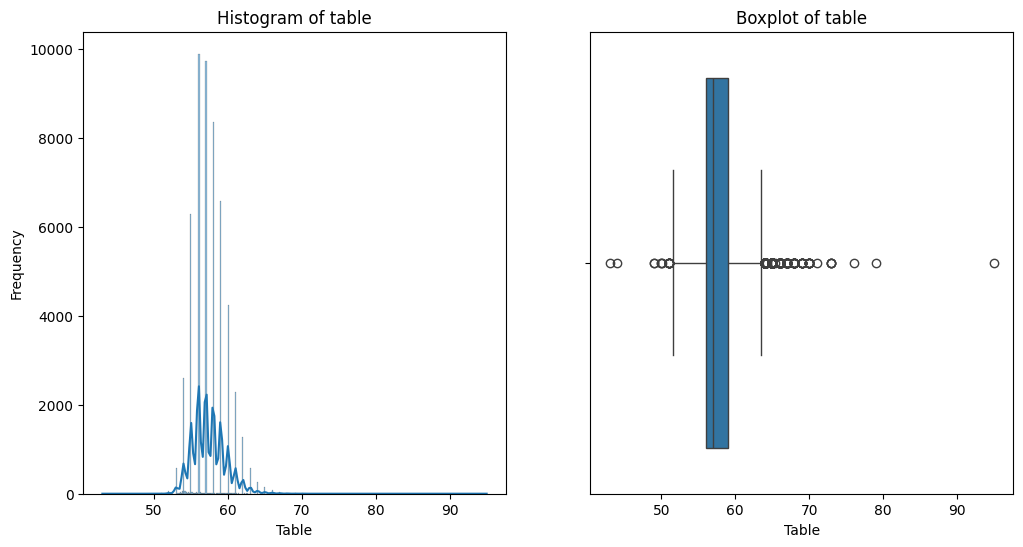

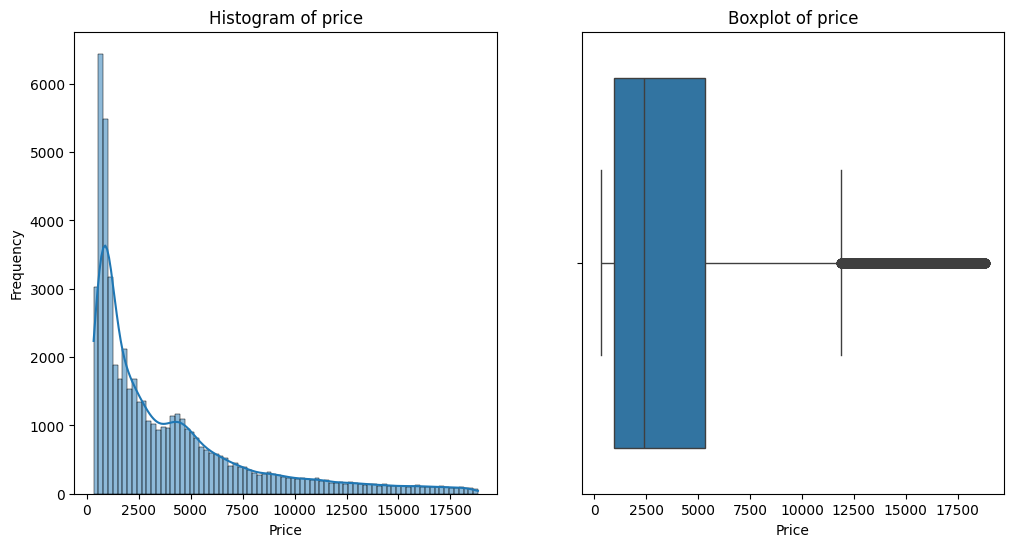

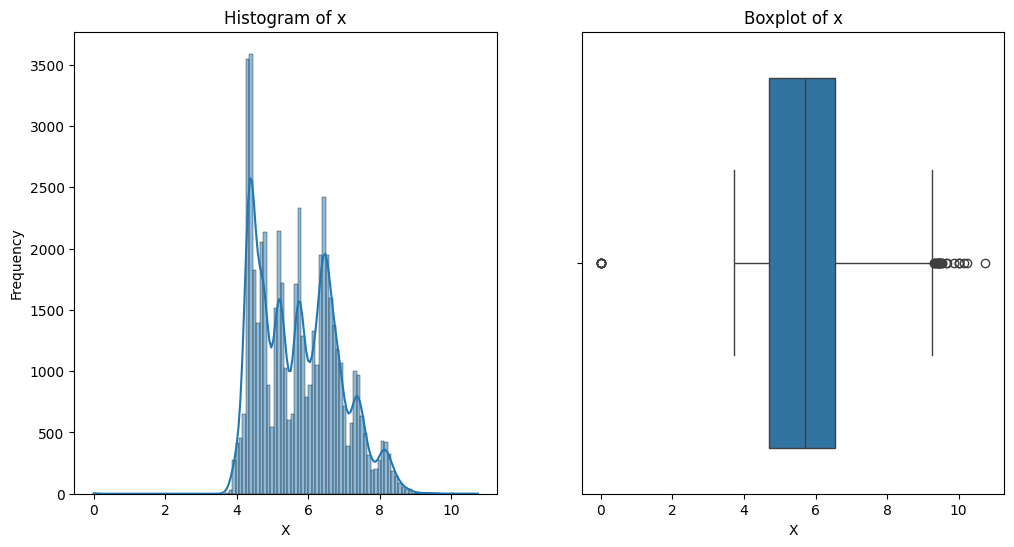

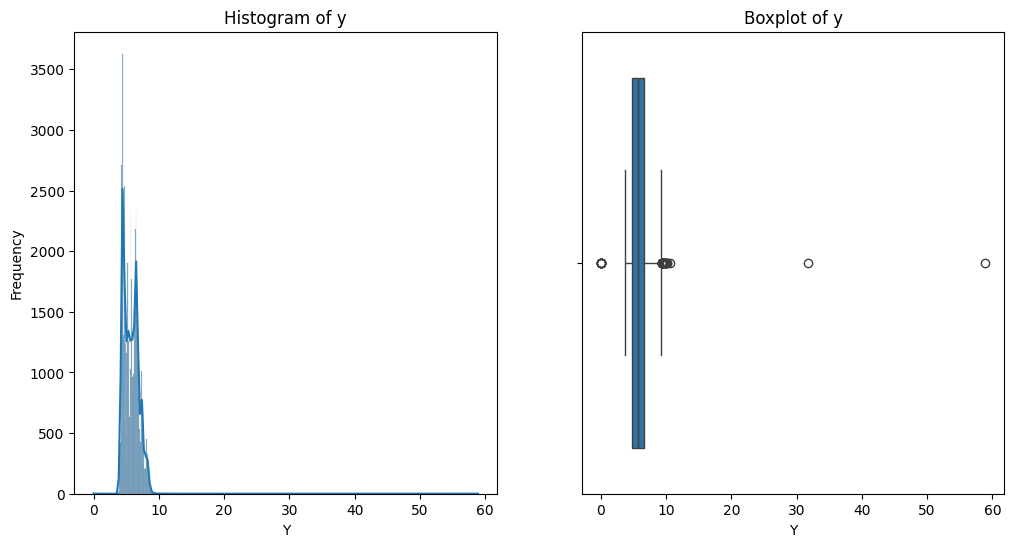

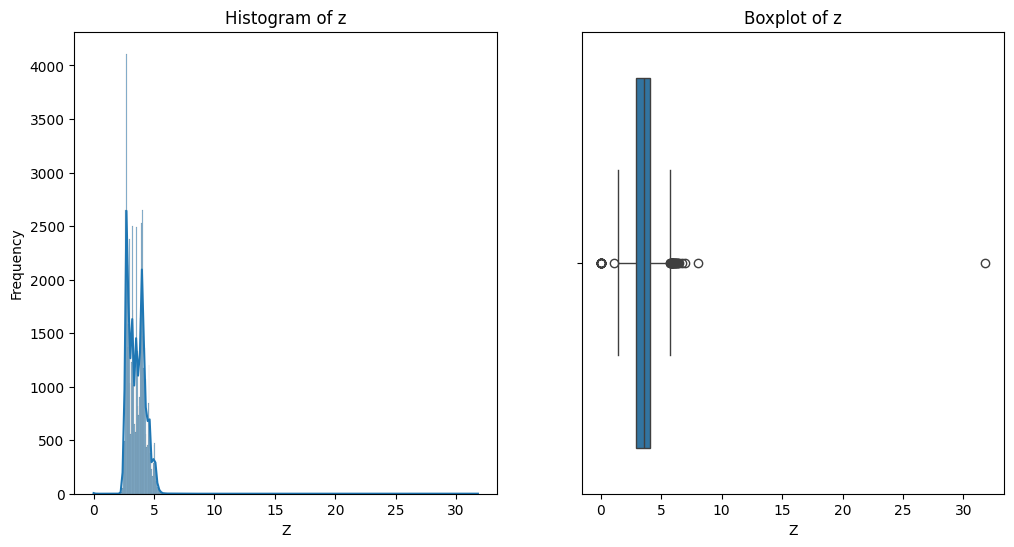

In [10]:
# Variables numéricas de la base de datos de diamantes
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col.capitalize())

    plt.show()

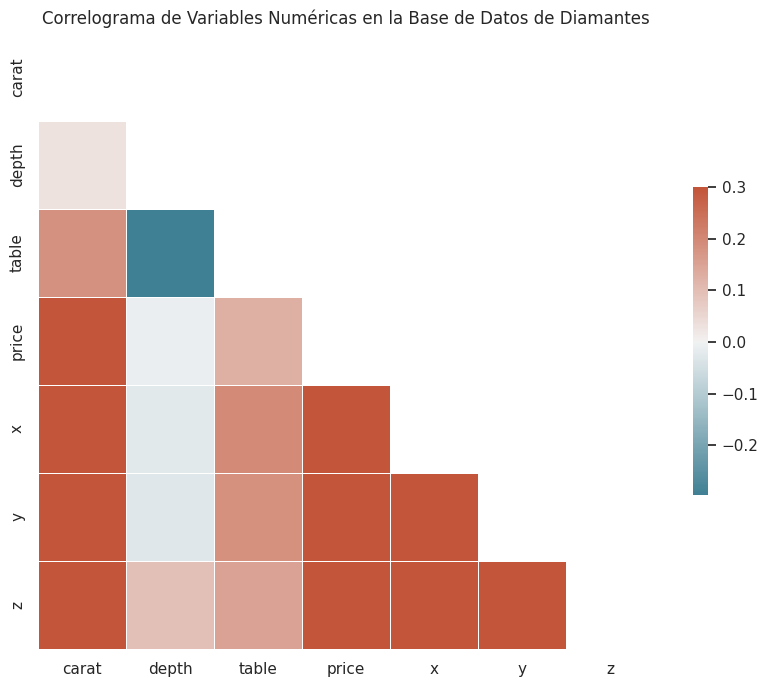

In [11]:
# Seleccionar solo las columnas numéricas
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Calcular la matriz de correlación solo para estas columnas
correlation_matrix = data[numerical_columns].corr()

# Configurar el estilo del gráfico
sns.set(style="white")

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Título del gráfico
plt.title('Correlograma de Variables Numéricas en la Base de Datos de Diamantes')
plt.show()

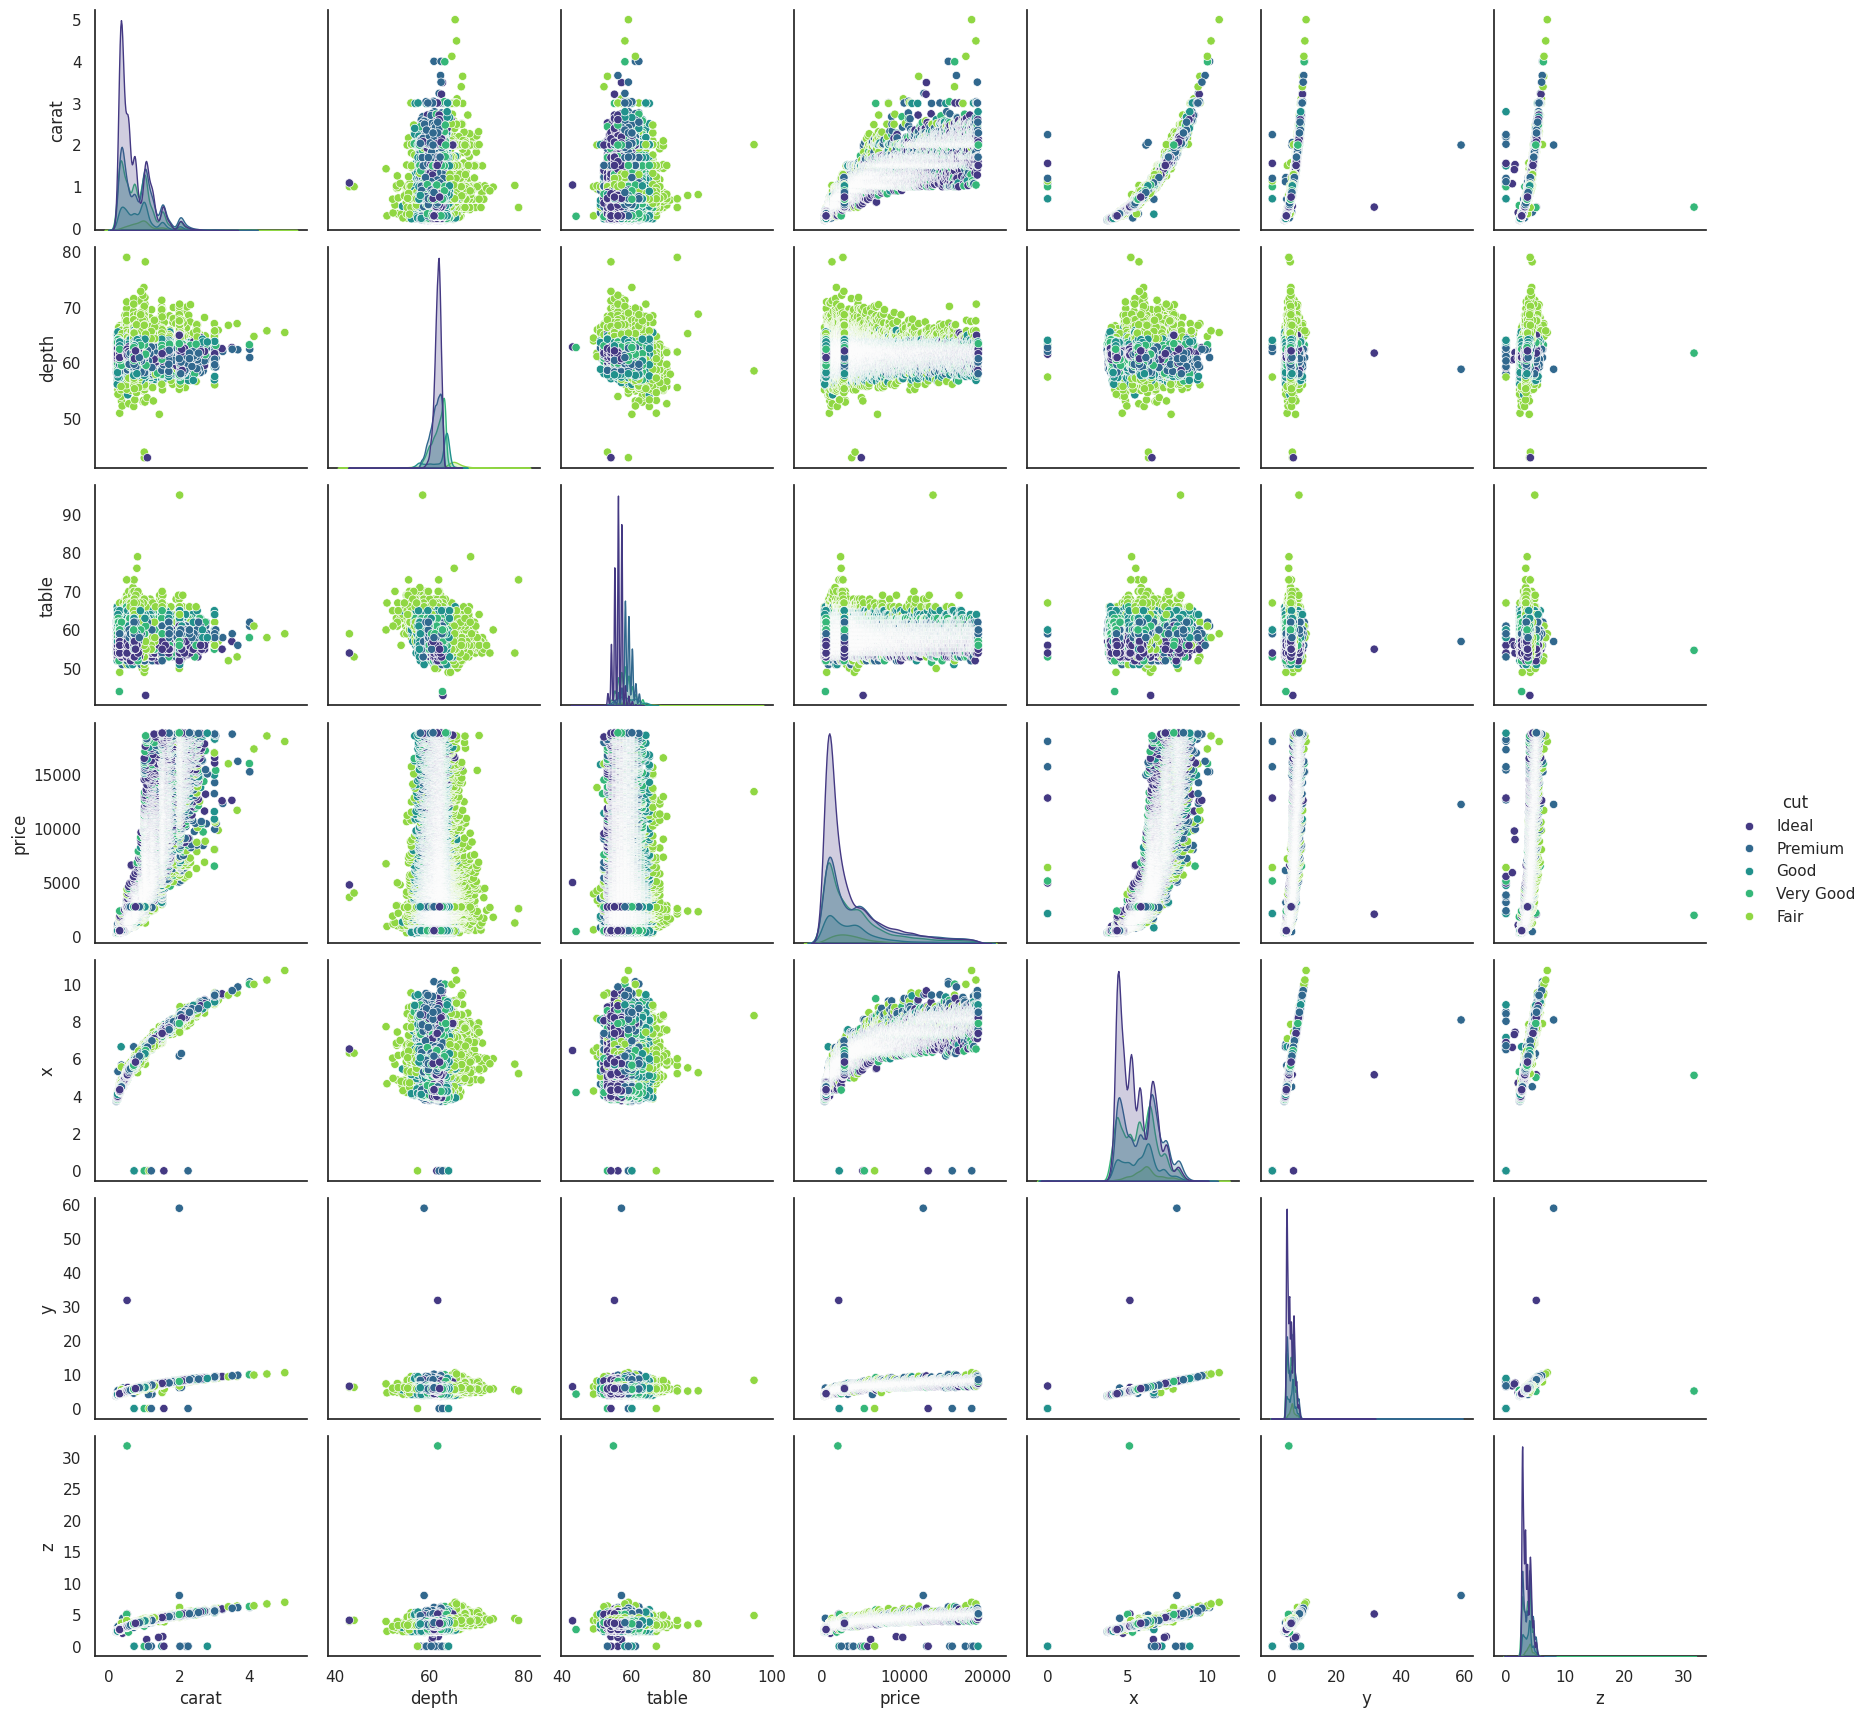

In [12]:
# Seleccionar solo las columnas numéricas junto con la variable categórica 'cut'
columns_to_plot = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut']

# Crear el pair plot
sns.pairplot(data[columns_to_plot], hue='cut', palette='viridis')
plt.show()